In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df = pd.read_csv("cleaned_SFM_dataset_2019_2022.csv")

In [3]:
df['t_date'] = pd.to_datetime(df['transaction_date'], format="%d/%m/%Y") 
df['t_date'] = df['t_date'].dt.to_period('M').dt.start_time
df = df[df['t_date'] < '2022-01'] #3 full years of data

In [4]:
loyal_df = df[df['loyalty'] == 'Loyalist'].reset_index().copy() #Loyal customers only

In [5]:
department_revenue = loyal_df.groupby('department')['price'].sum().reset_index()
commodity_revenue = loyal_df.groupby('commodity')['price'].sum().reset_index()

# Sort values to get top categories
department_revenue = department_revenue.sort_values(by='price', ascending=False)
commodity_revenue = commodity_revenue.sort_values(by='price', ascending=False)                                          

dpt_df = department_revenue.rename(columns={'price': 'total_revenue'})
com_df = commodity_revenue.rename(columns={'price': 'total_revenue'})

display(dpt_df.head(10).style.format({'total_revenue': '{:.2f}'}).hide(axis="index"))
display(com_df.head(10).style.format({'total_revenue': '{:.2f}'}).hide(axis="index"))

department,total_revenue
Grocery,22871.48
Meat,18568.49
Pharmaceutical,16013.27
Produce,13529.84
Deli,5392.31
Pastry,4820.64
Seafood,3154.77
Nutrition,3069.79
Cosmetics,987.59
Floral,868.24


commodity,total_revenue
Beef,6058.09
Cheese,2244.56
Salad,2125.78
Frozen meat,2101.90
Lunch meat,2089.73
Seafood-frozen,2013.24
Deli meats,2009.44
Pork,1829.08
Candy,1766.32
Cigarettes,1682.73


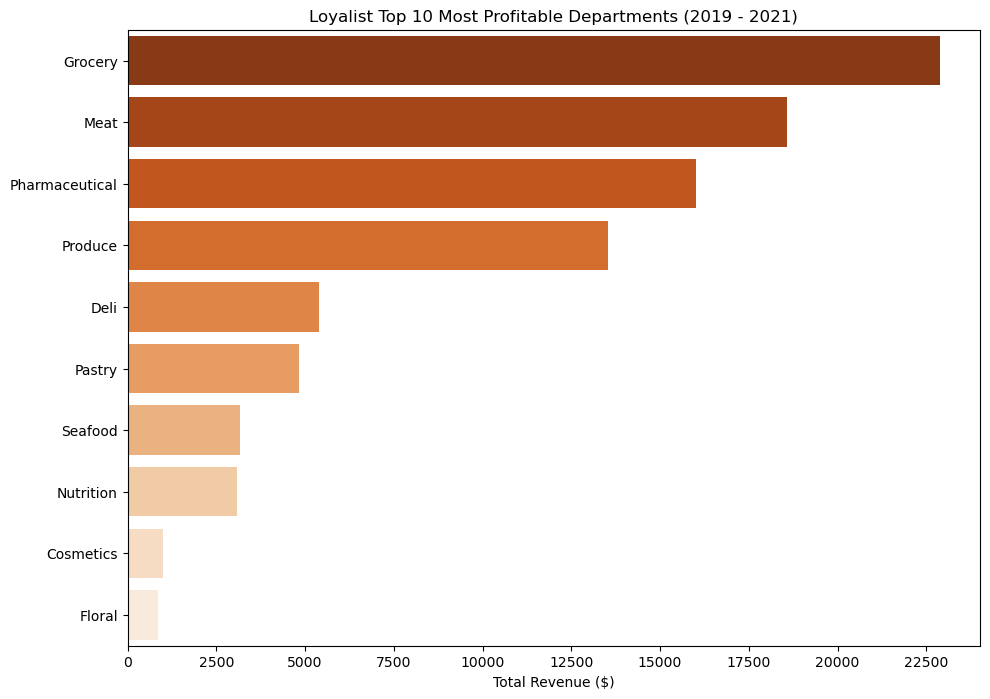

In [6]:
# Plot top 10 departments
plt.figure(figsize=(11, 8))
sns.barplot(data=department_revenue.head(10), y='department', x='price', palette='Oranges_r', hue='department', legend=False)
plt.title('Loyalist Top 10 Most Profitable Departments (2019 - 2021)')
plt.xlabel('Total Revenue ($)')
plt.ylabel('')
plt.xticks(ticks=range(0, int(department_revenue['price'].max()), 2500))

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show;

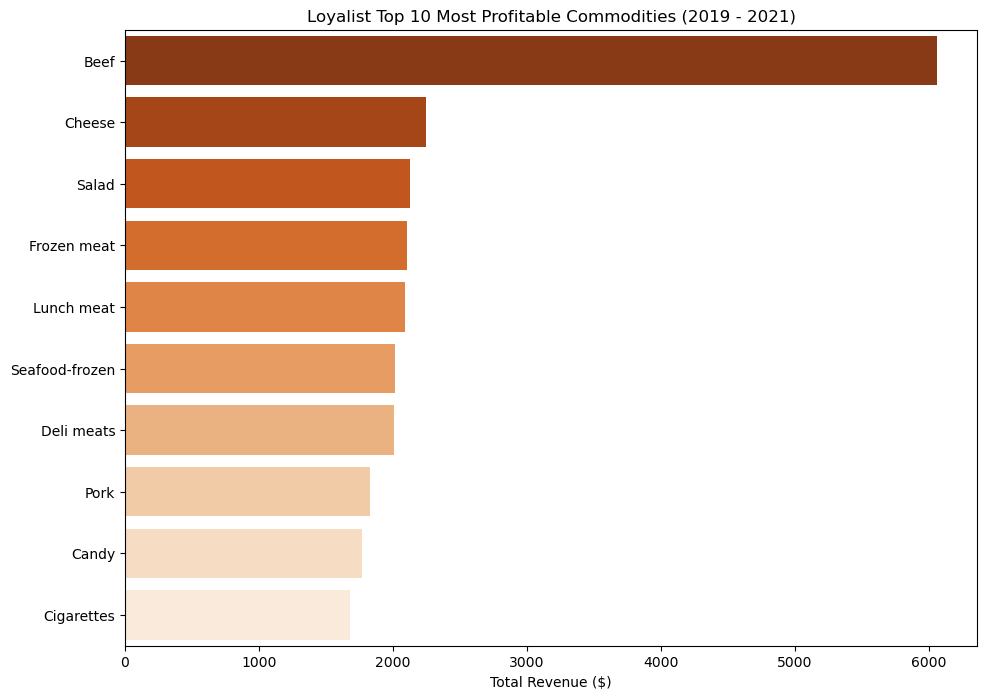

In [7]:
# Plot top 10 commodities
plt.figure(figsize=(11, 8))
sns.barplot(data=commodity_revenue.head(10), y='commodity', x='price', palette='Oranges_r', hue='commodity', legend=False)
plt.title('Loyalist Top 10 Most Profitable Commodities (2019 - 2021)')
plt.xlabel('Total Revenue ($)')
plt.ylabel('')

plt.savefig(f"Plots/{plt.gca().get_title()}.svg", format="svg", dpi=300, bbox_inches="tight")
plt.show();